In [1]:
# We shall use the balanced dataset for regression

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\Karthik P V\\Desktop\\CP2\\balanced_data.csv")

In [4]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Airleak
0,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [5]:
df.shape

(59908, 17)

In [6]:
df.drop('timestamp',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59908 entries, 0 to 59907
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP2              59908 non-null  float64
 1   TP3              59908 non-null  float64
 2   H1               59908 non-null  float64
 3   DV_pressure      59908 non-null  float64
 4   Reservoirs       59908 non-null  float64
 5   Oil_temperature  59908 non-null  float64
 6   Motor_current    59908 non-null  float64
 7   COMP             59908 non-null  float64
 8   DV_eletric       59908 non-null  float64
 9   Towers           59908 non-null  float64
 10  MPG              59908 non-null  float64
 11  LPS              59908 non-null  float64
 12  Pressure_switch  59908 non-null  float64
 13  Oil_level        59908 non-null  float64
 14  Caudal_impulses  59908 non-null  float64
 15  Airleak          59908 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 7.3 MB


In [8]:
df.duplicated().sum()

1151

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Checking for outliers

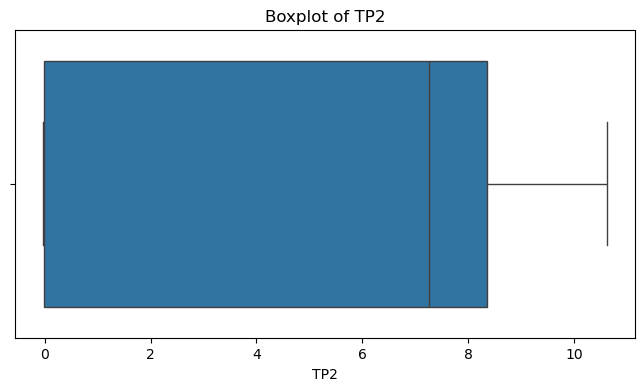

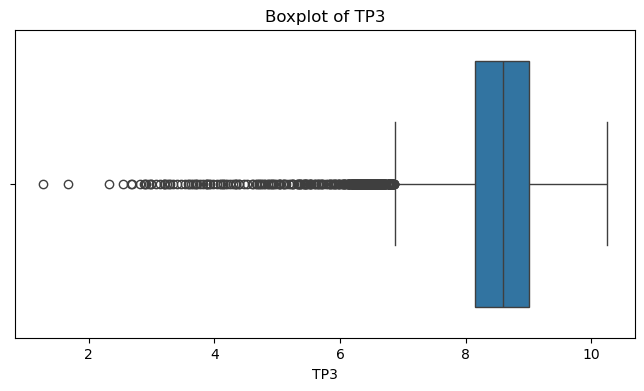

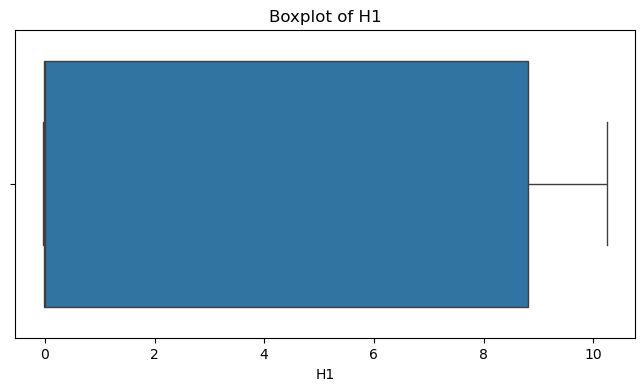

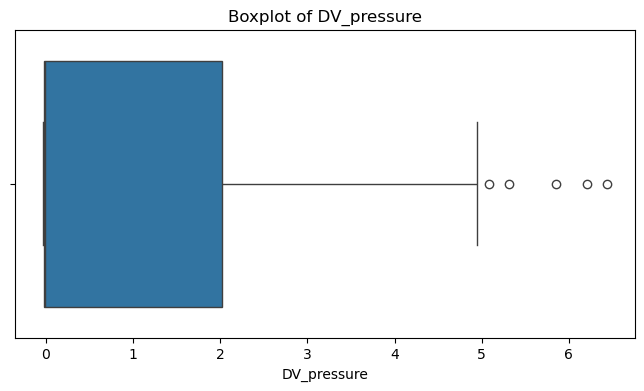

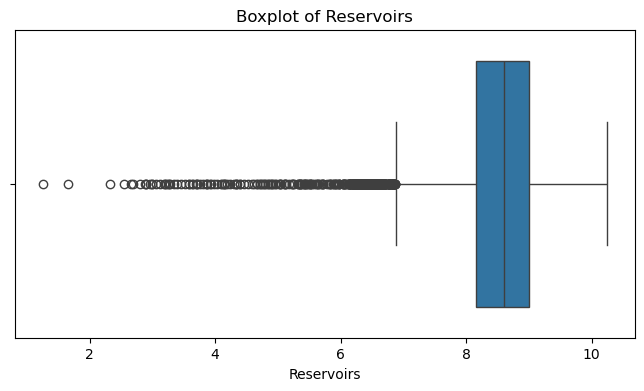

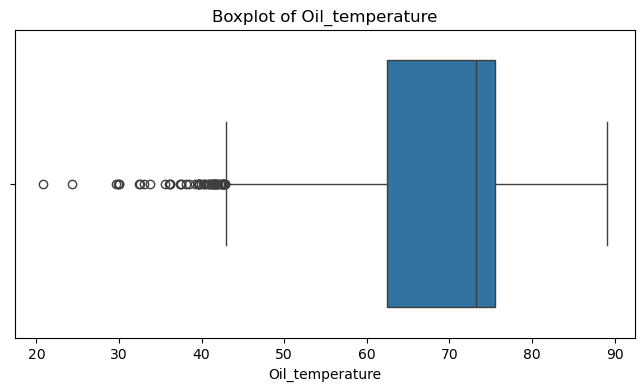

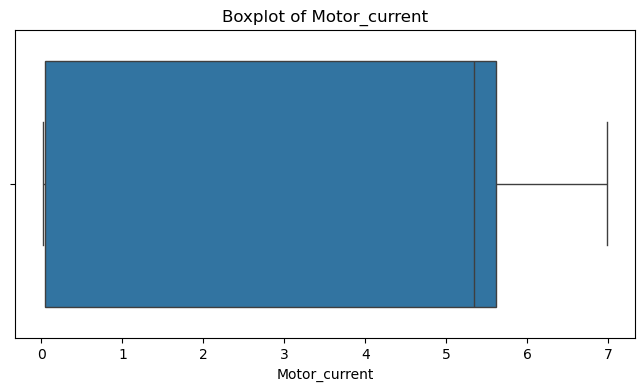

In [11]:
columns=['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','Motor_current']
# Plot boxplots only for numeric columns
for col in columns:  
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



There are outliers in 3 features . But we shall not treat the outliers because we are using 
Random Forest , Decision tree ,Gradient Boost,XG Boost as these models are insensitive to outliers

Scaling of Data is also not required

In [12]:
X=df.drop('Airleak',axis=1)
y=df['Airleak']

In [13]:
y.value_counts()

Airleak
1    29865
0    28892
Name: count, dtype: int64

In [14]:
# Since many features are higly correlated , lets perform PCA 

# PCA

Number of PCA components selected: 7


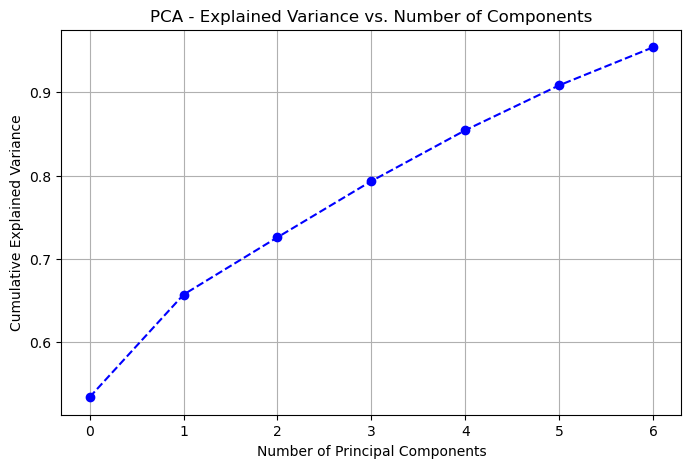

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -3.090010  1.445364  0.092423  0.192345  0.029677  1.063151  0.229768
1  2.500439  1.110233  0.049479  0.113259 -0.069930  0.241015 -1.017193
2  2.144702  0.905973  0.094685  0.164896  0.082627  0.081038  1.145390
3 -2.817355 -1.722214  0.042230  0.235856  0.690752 -0.473110 -0.111925
4  3.027021 -0.418247  0.043755  0.084013  0.132109 -0.452499 -0.986609


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the Data (Important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data

#  Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#  Check Number of Selected Components
num_components = pca.n_components_
print(f"Number of PCA components selected: {num_components}")

#  Plot Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

#  Convert Transformed Data to DataFrame
pca_columns = [f"PC{i+1}" for i in range(num_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Display first few rows of transformed data
print(X_train_pca_df.head())

# Now use X_train_pca_df and X_test_pca_df for model training


# Model Training

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [23]:
models_params = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [10, 20, 30],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [10, 20, 30],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        "params": {
            "n_estimators": [10, 20, 30],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

#  Train & Evaluate Models using GridSearchCV
results = []
best_models = {}

for model_name, model_info in models_params.items():
    print(f" Tuning {model_name} with GridSearchCV...")
    
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_pca_df, y_train)
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model  # Store best model
    
    # Predictions
    y_train_pred = best_model.predict(X_train_pca_df)
    y_test_pred = best_model.predict(X_test_pca_df)
    y_train_prob = best_model.predict_proba(X_train_pca_df)[:,1]
    y_test_prob = best_model.predict_proba(X_test_pca_df)[:,1]
    
     # Metrics
    metrics = {
        "Model": model_name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train F1": f1_score(y_train, y_train_pred, average="weighted"),
        "Test F1": f1_score(y_test, y_test_pred, average="weighted"),
        "Train Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Test Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Train Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "Test Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "Train AUC-ROC": roc_auc_score(y_train, y_train_prob),
        "Test AUC-ROC": roc_auc_score(y_test, y_test_prob)
    }
    results.append(metrics)

# Convert results to DataFrame for tabulation
results_df = pd.DataFrame(results)
print(results_df)

 Tuning Decision Tree with GridSearchCV...
 Tuning Random Forest with GridSearchCV...
 Tuning Gradient Boosting with GridSearchCV...
 Tuning XGBoost with GridSearchCV...
               Model  Train Accuracy  Test Accuracy  Train F1   Test F1  \
0      Decision Tree        0.997471       0.994894  0.997471  0.994894   
1      Random Forest        0.999562       0.995972  0.999562  0.995972   
2  Gradient Boosting        0.999903       0.995065  0.999903  0.995065   
3            XGBoost        0.998249       0.995972  0.998249  0.995972   

   Train Precision  Test Precision  Train Recall  Test Recall  Train AUC-ROC  \
0         0.997474        0.994903      0.997471     0.994894       0.999868   
1         0.999563        0.995977      0.999562     0.995972       1.000000   
2         0.999903        0.995070      0.999903     0.995065       1.000000   
3         0.998251        0.995978      0.998249     0.995972       0.999988   

   Test AUC-ROC  
0      0.996713  
1      0.999255  

Observations:
* Random Forest & XGBoost have the highest Test AUC-ROC (> 0.999), meaning they separate classes well.
* Gradient Boosting & XGBoost are slightly overfitting (train accuracy is almost 1, test accuracy is lower).
* Decision Tree has the lowest performance compared to ensemble models.
* Random Forest is well-balanced between accuracy and generalization.



# Export the model and deploy on streamlit

In [28]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data

# Step 2: PCA Transformation
pca = PCA(n_components=7)  # Set the number of components
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on training data

# Step 3: Train Model
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Step 4: Save Model, Scaler, and PCA Transformer
with open("best_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

with open("pca.pkl", "wb") as file:
    pickle.dump(pca, file)

print("Model, Scaler, and PCA saved successfully!")


Model, Scaler, and PCA saved successfully!
